## Machine Learning Project

This project's primary objective is to understand and gain insights into the machine learning algorithms of Support Vector Machines (SVM), Decision Trees, and Random Forests. The primary focus lies in comparing these models and utilizing them for predictive tasks while also assessing their performance.

 Within the scope of this project, we will leverage the three aforementioned models to make predictions regarding whether an individual's income exceeds $50,000 per year. This prediction will be based on census data. Furthermore, we will conduct a comprehensive evaluation and comparison of these models' performance.

In [210]:
#Importing Essential Libraries for Our Prediction

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA
!pip install imblearn
from imblearn import over_sampling

Defaulting to user installation because normal site-packages is not writeable


In [211]:
#Loading the Dataset
adult = pd.read_csv('adult.data',)

#Specifying Column Names Based on Provided Information in the documentations
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [212]:
# Assigning Column Names to the DataFrame
adult.columns = column_names
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [213]:
# Checking Basic Data Details
adult.info()  # The dataset consists of 15 columns with a mix of numeric and categorical values, comprising a total of 32,560 rows.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [214]:
# Verifying Absence of Missing Values
adult.isna().sum()  # No missing values are present in this dataset.

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### EDA Analysis:
Before I delve into the machine learning section of this project. I will be performing exploratory data analysis on the data to obtain valuable insights about the data on how to prepare and process the data to fit the suitablity of each model and obtain optimal model performance

In [215]:
# Reviewing Descriptive Statistics
# The descriptive statistics reveal variations in scale among the numerical attributes. Consequently, normalization will be applied to address this issue.
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [216]:
# Examining Descriptive Statistics for Categorical Data
# We observe that all columns are relevant for prediction, with none deemed redundant.
adult.describe(include=object)
# These categorical attributes will undergo encoding for modeling purposes.


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


<AxesSubplot:xlabel='income', ylabel='count'>

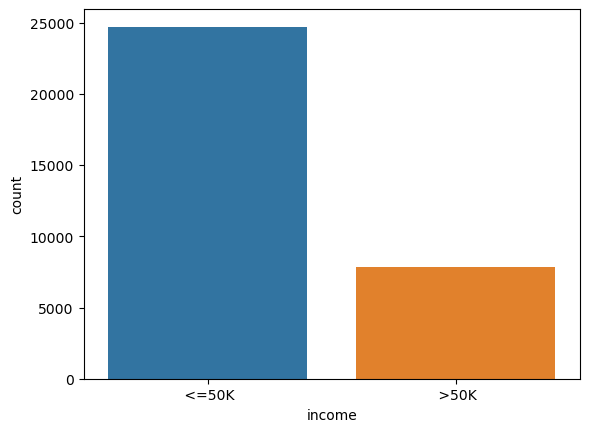

In [217]:
# Analyzing the Distribution of the Target Variable
sns.countplot(x='income', data=adult) 
# It appears that we are working with a highly imbalanced dataset, and addressing this class imbalance will be necessary.

In [218]:
# Assessing the Percentage Distribution of Target Classes
adult['income'].value_counts(normalize=True) * 100 
# The dataset exhibits significant class imbalance, with '<=50K' representing approximately 76% of the data, and '>50K' accounting for around 24%. Mitigating this imbalance will be a priority.

 <=50K    75.918305
 >50K     24.081695
Name: income, dtype: float64

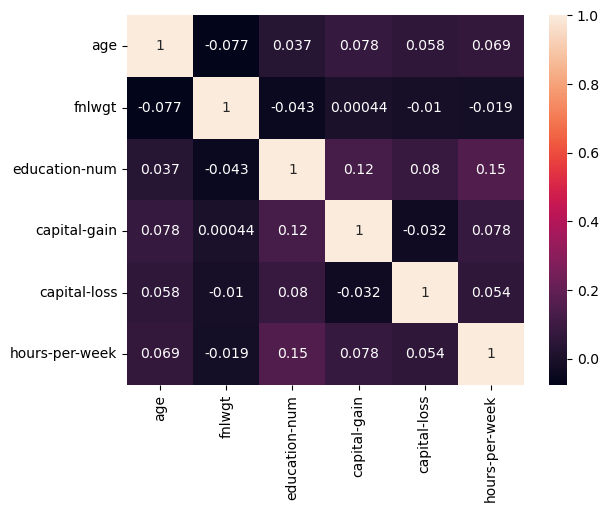

In [219]:
# Investigating Feature Relationships
sns.heatmap(adult.corr(), annot=True)
plt.show()
# It appears that there are no signs of multicollinearity among the features, indicating that all columns can be utilized for modeling.

In [220]:
# Exploring Data Distribution
#sns.pairplot(adult, hue='income')  
# The pairplot reveals that the target classes are not entirely linearly separable, 
# as there is some overlap between them.
#plt.show()

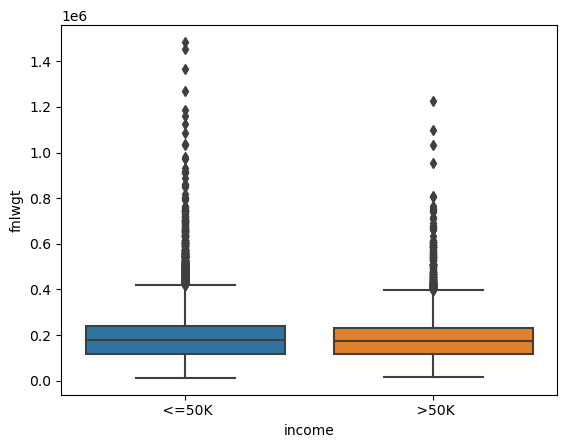

In [221]:
# Visualizing Feature Distributions in Relation to the Target Class (Numerical Features First)
sns.boxplot(x='income', y='fnlwgt', data=adult)  # It appears that the 'fnlwgt' feature does not exhibit significant differences between the income classes.
plt.show()

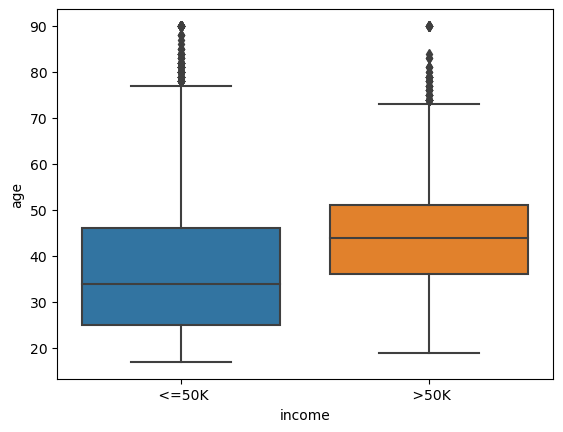

In [222]:
# Visualizing the Distribution of the 'age' Feature in Relation to the Target Class
sns.boxplot(x='income', y='age', data=adult)  
plt.show()
# On average, individuals with income >50K tend to be older than those with income <=50K.


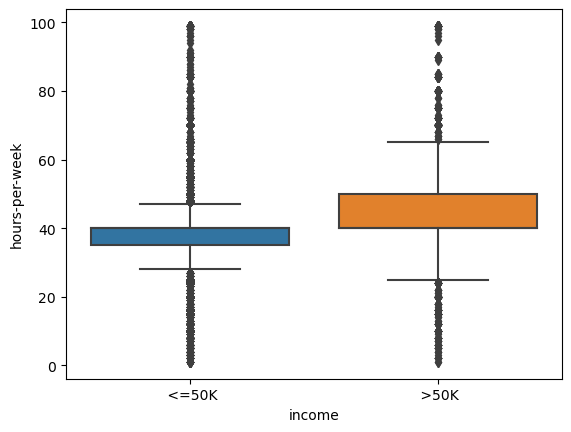

In [223]:
# Visualizing the Distribution of the 'hours-per-week' Feature in Relation to the Target Class
sns.boxplot(x='income', y='hours-per-week', data=adult)  
plt.show()
# On average, individuals who work more hours per week tend to have income >50K compared to those who work fewer hours.


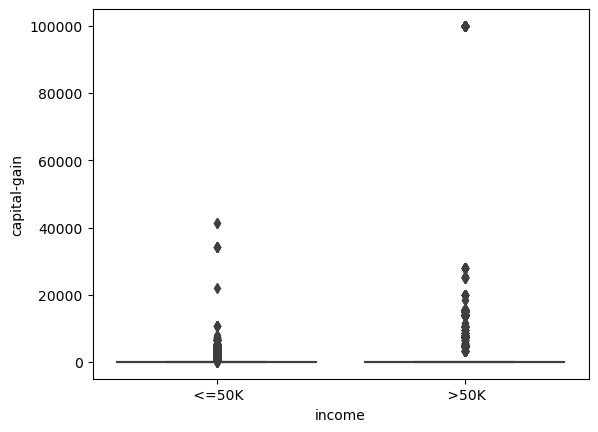

In [224]:
# Visualizing the Distribution of the 'capital-gain' Feature in Relation to the Target Class
sns.boxplot(x='income', y='capital-gain', data=adult)  
plt.show()
# On average, individuals with income >50K tend to have higher capital gains compared to those with income <=50K.


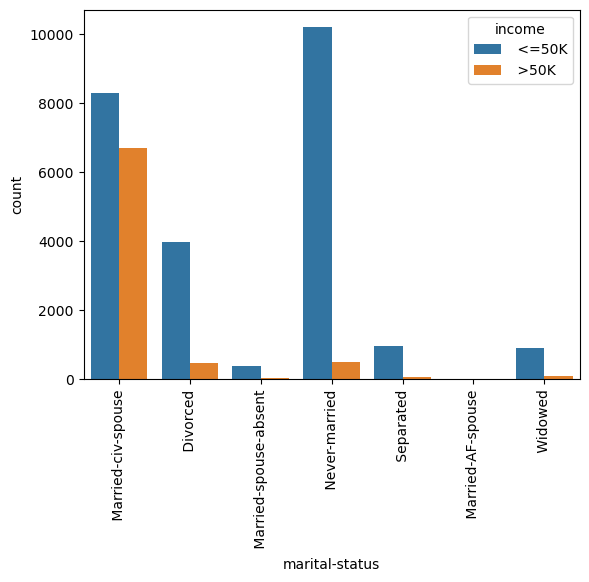

In [225]:
# Visualizing Marital Status in Relation to the Target Class
sns.countplot(x='marital-status', hue='income', data=adult) 
plt.xticks(rotation=90)
plt.show()
# With the exception of married individuals, other marital status categories tend to have a higher proportion of individuals with income <=50K.


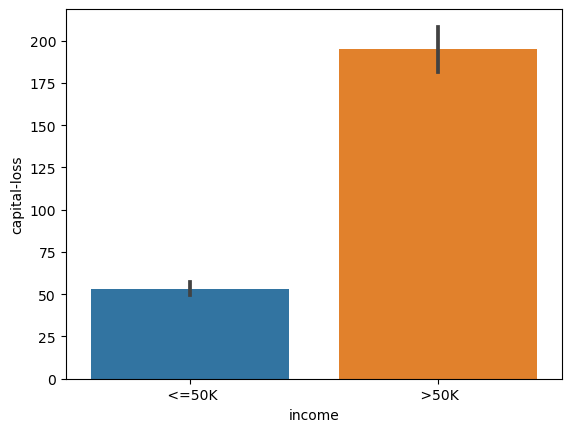

In [226]:
# Visualizing the Distribution of the 'capital-loss' Feature in Relation to the Target Class
sns.barplot(x='income', y='capital-loss', data=adult) 
plt.show()
# On average, individuals with income >50K tend to have higher capital losses compared to those with income <=50K.


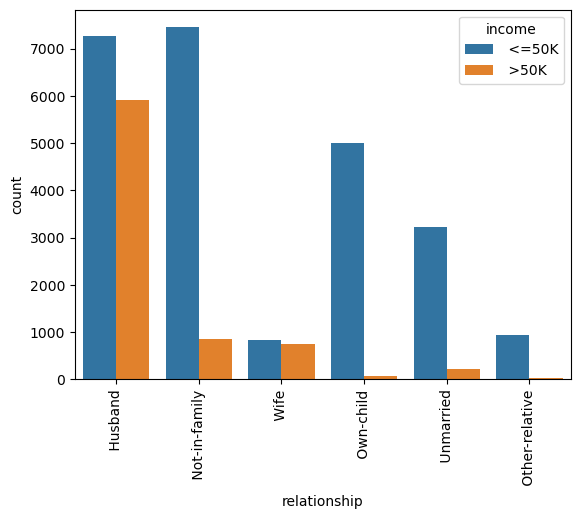

In [227]:
# Visualizing Relationship Status in Relation to the Target Class
sns.countplot(x='relationship', hue='income', data=adult) 
plt.xticks(rotation=90)
plt.show()
# Individuals who have a 'Own-child' relationship status tend to have a lower proportion of >50K income when compared to other relationship categories.


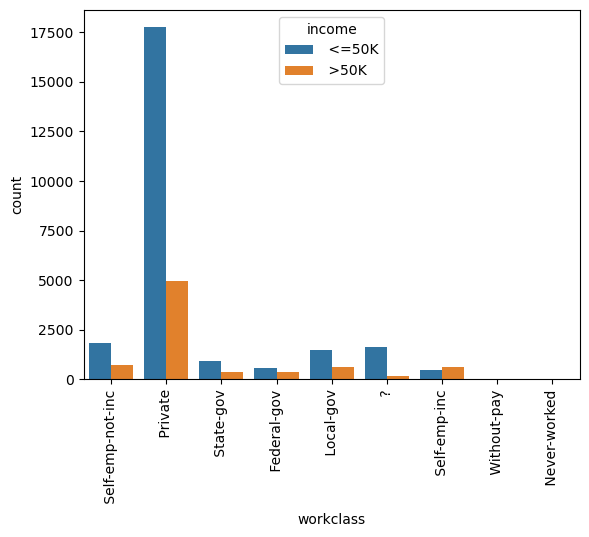

In [228]:
# Visualizing Working Class in Relation to the Target Class
sns.countplot(x='workclass', hue='income', data=adult)  
plt.xticks(rotation=90)
plt.show()
# Individuals in the 'Self-emp' workclass category tend to have a higher proportion of income >50K.


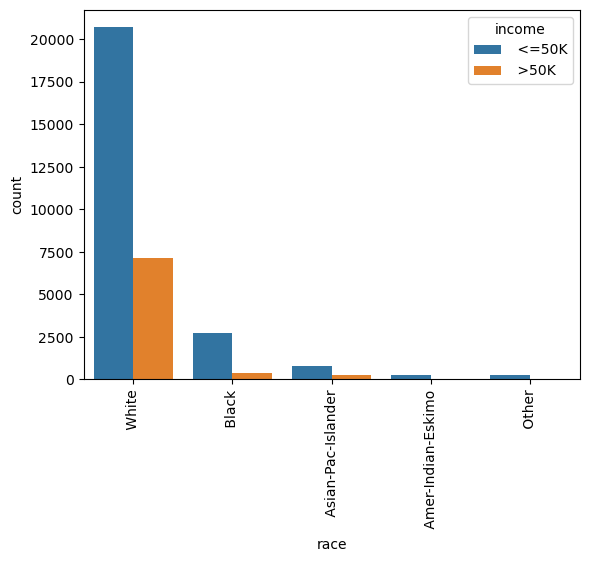

In [229]:
# Visualizing Race in Relation to the Target Class
sns.countplot(x='race', hue='income', data=adult) 
plt.xticks(rotation=90)
plt.show()
# The proportion of individuals with income >50K is notably lower within the 'Black' and Eskimo racial category.


### Data Preprocessing and Transformation

With the insights gained from our exploratory analysis, we will proceed to preprocess and transform our data to make it compatible with our modeling process.

In [230]:
# Encoding the Target Class Column
adult['income'] = adult['income'].str.strip().replace({'>50K': 1, '<=50K': 0})
adult['income']

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: income, Length: 32560, dtype: int64

In [231]:
# Removing outliers in the fnlwgt

# calculating the mean, std
fnlwgt_mean=adult['fnlwgt'].mean()
fnlwgt_std = adult['fnlwgt'].std()

#calculating the cutoff
fnlwgt_cutoff = fnlwgt_std*3

#specifying the lower and upper threshold
lower, upper = fnlwgt_mean - fnlwgt_std,  fnlwgt_mean + fnlwgt_std

trimmed_adult =adult[(adult['fnlwgt'] < upper) & (adult['fnlwgt'] > lower)]

In [232]:
# Resetting the index
trimmed_adult.reset_index(drop=True, inplace=True)
trimmed_adult.shape

(23571, 15)

In [233]:
# Removing outliers in the fnlwgt

# calculating the mean, std
fnlwgt_mean = adult['fnlwgt'].mean()
fnlwgt_std = adult['fnlwgt'].std()

# calculating the cutoff
fnlwgt_cutoff = fnlwgt_std*3

# specifying the lower and upper threshold
lower, upper = fnlwgt_mean - fnlwgt_std,  fnlwgt_mean + fnlwgt_std

trimmed_adult = adult[(adult['fnlwgt'] < upper) & (adult['fnlwgt'] > lower)]


(15002, 15)

In [234]:
# Removing outliers in the hours-per-week column

# calculating the mean, std
hour_mean=trimmed_adult2['hours-per-week'].mean()
hour_std = trimmed_adult2['hours-per-week'].std()

#calculating the cutoff
hour_cutoff = hour_std * 3

#specifying the lower and upper threshold
lower, upper = hour_mean - hour_std, hour_mean + hour_std

trimmed_adult3 =trimmed_adult2[(trimmed_adult2['hours-per-week'] < upper) & (trimmed_adult2['hours-per-week'] > lower)]
trimmed_adult3.shape

(11852, 15)

In [235]:
# Encoding Categorical Features Using pd.get_dummies

# Identifying the Categorical Columns
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Applying One-Hot Encoding to Categorical Columns
df = pd.get_dummies(trimmed_adult3, columns=categorical_columns, drop_first=True)

In [236]:
# Segregating the Data into Dependent and Independent Variables
X = df.drop(['income'], axis=1)
y = df['income']

In [237]:
# Addressing target class imbalance by sampling the data
# creating an oversampling object
sm=over_sampling.SMOTE()
# Resampling X and y
X_res, y_res=sm.fit_resample(X,y)
X_res.shape

(16768, 98)

Text(0.5, 1.0, 'Target Class Distribution')

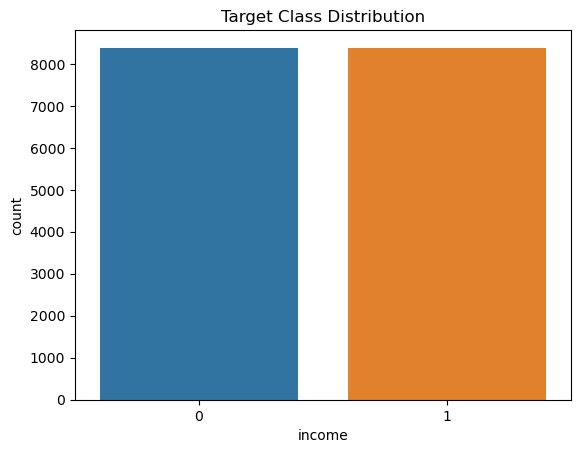

In [238]:
# Visualizing the Distribution of the resampled Target Class
sns.countplot(x=y_res)
plt.title('Target Class Distribution')

In [239]:
# Dividing the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, stratify=y_res, random_state=101)

In [240]:
# Standardizing the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Constructing the Model

In [241]:
# Creating an Instance of the Neural Network Model
neural_model = MLPClassifier(hidden_layer_sizes=(50,100), early_stopping=True, max_iter=250)

# Training the Neural Network Model
neural_model.fit(X_train_scaled, y_train)

# Evaluating the Training Accuracy
neural_model.score(X_train_scaled, y_train)

0.9009968475760416

In [242]:
# Initializing the Decision Tree Model
dt_model = DecisionTreeClassifier()

# Training the Decision Tree Model
dt_model.fit(X_train_scaled, y_train)

# Assessing the Training Accuracy
dt_model.score(X_train_scaled, y_train)

1.0

In [243]:
# Creating the Random Forest Model
rf_model = RandomForestClassifier(min_samples_split=50)

# Training the Random Forest Model
rf_model.fit(X_train_scaled, y_train)

# Verifying the Training Accuracy
rf_model.score(X_train_scaled, y_train)

0.8987816307403936

# Evaluating and Comparing Model Performance Using Cross-Validation

In [249]:
# Creating lists to store model results and names
models = []
results = []
names = []
scoring = 'roc_auc'

# Use make_scorer to create a scorer for F1 score
f1_scorer = make_scorer(f1_score, average='weighted')

# Adding models to the list for evaluation
models.append(('Neural Network', MLPClassifier(
    hidden_layer_sizes=(100, 100), early_stopping=True, max_iter=250)))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('RandomForest', RandomForestClassifier(min_samples_split=40)))

# Evaluating models using k-fold cross-validation
for name, model in models:
    # Setting up k-fold cross-validation with 10 splits
    kf = KFold(n_splits=15, shuffle=True, random_state=101)

    # Calculating cross-validation scores for the current model
    cv_result = cross_val_score(
        model, X_train_scaled, y_train, cv=kf, scoring=f1_scorer)

    # Appending scores and model names to respective lists
    results.append(cv_result)
    names.append(name)

    # Displaying mean and standard deviation of cross-validation scores for the current model
    print(f'{name}: {cv_result.mean()}, {cv_result.std()}')


Neural Network: 0.8606610705049228, 0.012541064973700356
Decision Tree: 0.8301160773913875, 0.010999979113503037
RandomForest: 0.871079967634521, 0.011263713880685627


Text(0.5, 1.0, 'Performance Comparison of Different Models')

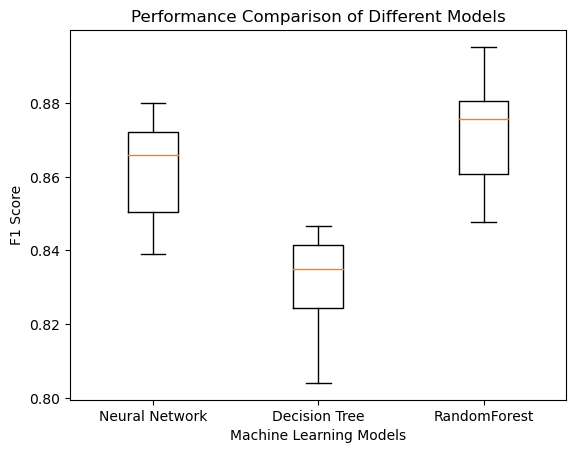

In [245]:
# Creating a Box Plot of Model Performance
 
plt.boxplot(results, labels=names)
plt.xlabel('Machine Learning Models')
plt.ylabel('F1 Score')
plt.title('Performance Comparison of Different Models')


In [252]:
# Model Performance on the test data
test_result = []
test_name = []

# Looping the the models to calculate performance result
for name_test, model_test in models:
    # Fitting the model to the training data
    model_test.fit(X_train_scaled, y_train)

    # Making predictions on the test data
    prediction = model_test.predict(X_test_scaled)

    # Calculating the ROC AUC score using the true labels and the model's predictions
    test_scores = metrics.f1_score(y_test, prediction)

    # appending the result and names to a list
    test_result.append(test_scores)
    test_name.append(name_test)

    # Printing the model name and its ROC AUC score
    print(f'{name_test}: {test_scores}')


Neural Network: 0.8685258964143427
Decision Tree: 0.8363851151801537
RandomForest: 0.8764135702746364


Text(0.5, 1.0, 'Comparison of Model ROC AUC Scores on Test Data')

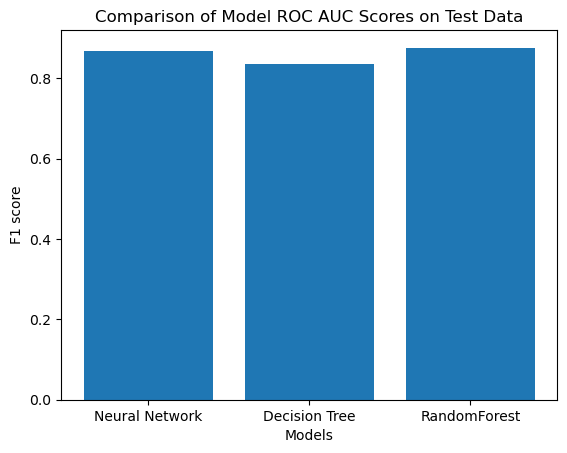

In [253]:
# Visualizing the test data performance result

plt.style.use('default')
plt.bar(test_name,test_result)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('F1 score')
plt.title('Comparison of Model ROC AUC Scores on Test Data')

In [ ]:
X